# Introduction

I created this notebook to show what I have learned with stacking and boosting models.
I currently work as a data scientist, but most of my projects don't involve boosting or stacking.

In [66]:
% matplotlib inline

import matplotlib.pyplot as plt

import os

import pandas as pd
import numpy as np
import seaborn as sns

# Loading the data

I do not have any domain knowledge of this challenge, but I have been reading and viewing other kernels.
The following loading and renaming of features is not my own work.

In [67]:
test = pd.read_csv('../input/nomad2018-predict-transparent-conductors/test.csv')
test_id = test.id

train = pd.read_csv('../input/nomad2018-predict-transparent-conductors/train.csv')

The following was taken from another kaggler's script, but adds atomic coordinates

In [69]:
# get coordinate information

ga_cols = []
al_cols = []
o_cols = []
in_cols = []

import warnings
warnings.filterwarnings("ignore")

for i in range(6):
    ga_cols.append("Ga_"+str(i))

for i in range(6):
    al_cols.append("Al_"+str(i))

for i in range(6):
    o_cols.append("O_"+str(i))

for i in range(6):
    in_cols.append("In_"+str(i))



ga_df= pd.DataFrame(columns=ga_cols)
al_df = pd.DataFrame(columns=al_cols)
o_df = pd.DataFrame(columns= o_cols)
in_df = pd.DataFrame(columns=in_cols)

def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=np.float),x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=np.float))
    return pos_data, np.array(lat_data)



for i in train.id.values:
    fn = "../input/nomad2018-predict-transparent-conductors/train/{}/geometry.xyz".format(i)
    train_xyz, train_lat = get_xyz_data(fn)
    
    ga_list = []
    al_list = []
    o_list = []
    in_list = []
    
    for li in train_xyz:
        try:
            if li[1] == "Ga":
                ga_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "Al":
                al_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "In":
                in_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "O":
                o_list.append(li[0])
        except:
            pass
    try:
        model = PCA(n_components=2)
        ga_list = np.array(ga_list)
        temp_ga = model.fit_transform(ga_list.transpose())
        temp_ga = [item for sublist in temp_ga for item in sublist]
       
    except:
        temp_ga = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        al_list = np.array(al_list)
        temp_al = model.fit_transform(al_list.transpose())
        temp_al = [item for sublist in temp_al for item in sublist]
#         print i
    except:
        temp_al = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        o_list = np.array(o_list)
        temp_o = model.fit_transform(o_list.transpose())
        temp_o = [item for sublist in temp_o for item in sublist]
#         print i
    except:
        temp_o = [0,0,0,0,0,0]
#         print i
    
    try:
        model = PCA(n_components=2)
        in_list = np.array(in_list)
        temp_in = model.fit_transform(in_list.transpose())
        temp_in = [item for sublist in temp_in for item in sublist]
#         print i
    except:
        temp_in = [0,0,0,0,0,0]
#         print i

    temp_ga = pd.DataFrame(temp_ga).transpose()
    temp_ga.columns = ga_cols
    temp_ga.index = np.array([i])

    temp_al = pd.DataFrame(temp_al).transpose()
    temp_al.columns = al_cols
    temp_al.index = np.array([i])

    temp_o = pd.DataFrame(temp_o).transpose()
    temp_o.columns = o_cols
    temp_o.index = np.array([i])
    
    temp_in = pd.DataFrame(temp_in).transpose()
    temp_in.columns = in_cols
    temp_in.index = np.array([i])
    
    

    ga_df = pd.concat([ga_df,temp_ga])
    al_df = pd.concat([al_df,temp_al])
    o_df = pd.concat([o_df,temp_o])    
    in_df = pd.concat([in_df,temp_in])
    
ga_df["id"] = ga_df.index
al_df["id"] = al_df.index
o_df["id"] = o_df.index
in_df["id"] = in_df.index

train = pd.merge(train,ga_df,on = ["id"],how = "left")
train = pd.merge(train,al_df,on = ["id"],how = "left")
train = pd.merge(train,o_df,on = ["id"],how = "left")
train = pd.merge(train,in_df,on = ["id"],how = "left")

ga_df= pd.DataFrame(columns=ga_cols)
al_df = pd.DataFrame(columns=al_cols)
o_df = pd.DataFrame(columns= o_cols)
in_df = pd.DataFrame(columns=in_cols)

for i in test.id.values:
    fn = "../input/nomad2018-predict-transparent-conductors/test/{}/geometry.xyz".format(i)
    test_xyz, test_lat = get_xyz_data(fn)
    
    ga_list = []
    al_list = []
    o_list = []
    in_list = []
    
    for li in test_xyz:
        try:
            if li[1] == "Ga":
                ga_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "Al":
                al_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "In":
                in_list.append(li[0])
        except:
            pass
        try:
            if li[1] == "O":
                o_list.append(li[0])
        except:
            pass
    
#     ga_list = [item for sublist in ga_list for item in sublist]
#     al_list = [item for sublist in al_list for item in sublist]
#     o_list = [item for sublist in o_list for item in sublist]
   
    
    try:
        model = PCA(n_components=2)
        ga_list = np.array(ga_list)
        temp_ga = model.fit_transform(ga_list.transpose())
        temp_ga = [item for sublist in temp_ga for item in sublist]
       
    except:
        temp_ga = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        al_list = np.array(al_list)
        temp_al = model.fit_transform(al_list.transpose())
        temp_al = [item for sublist in temp_al for item in sublist]
#         print i
    except:
        temp_al = [0,0,0,0,0,0]
#         print i
    try:
        model = PCA(n_components=2)
        o_list = np.array(o_list)
        temp_o = model.fit_transform(o_list.transpose())
        temp_o = [item for sublist in temp_o for item in sublist]
#         print i
    except:
        temp_o = [0,0,0,0,0,0]
#         print i
    
    try:
        model = PCA(n_components=2)
        in_list = np.array(in_list)
        temp_in = model.fit_transform(in_list.transpose())
        temp_in = [item for sublist in temp_in for item in sublist]
#         print i
    except:
        temp_in = [0,0,0,0,0,0]
#         print i

    temp_ga = pd.DataFrame(temp_ga).transpose()
    temp_ga.columns = ga_cols
    temp_ga.index = np.array([i])

    temp_al = pd.DataFrame(temp_al).transpose()
    temp_al.columns = al_cols
    temp_al.index = np.array([i])

    temp_o = pd.DataFrame(temp_o).transpose()
    temp_o.columns = o_cols
    temp_o.index = np.array([i])
    
    temp_in = pd.DataFrame(temp_in).transpose()
    temp_in.columns = in_cols
    temp_in.index = np.array([i])
    
    

    ga_df = pd.concat([ga_df,temp_ga])
    al_df = pd.concat([al_df,temp_al])
    o_df = pd.concat([o_df,temp_o])    
    in_df = pd.concat([in_df,temp_in])
    

ga_df["id"] = ga_df.index
al_df["id"] = al_df.index
o_df["id"] = o_df.index
in_df["id"] = in_df.index

test = pd.merge(test,ga_df,on = ["id"],how = "left")
test = pd.merge(test,al_df,on = ["id"],how = "left")
test = pd.merge(test,o_df,on = ["id"],how = "left")
test = pd.merge(test,in_df,on = ["id"],how = "left")

In [74]:
train.rename(columns={
    'spacegroup' : 'sg',
    'number_of_total_atoms' : 'Natoms',
    'percent_atom_al' : 'x_Al',
    'percent_atom_ga' : 'x_Ga',
    'percent_atom_in' : 'x_In',
    'lattice_vector_1_ang' : 'a',
    'lattice_vector_2_ang' : 'b',
    'lattice_vector_3_ang' : 'c',
    'lattice_angle_alpha_degree' : 'alpha',
    'lattice_angle_beta_degree' : 'beta',
    'lattice_angle_gamma_degree' : 'gamma',
    'formation_energy_ev_natom' : 'E',
    'bandgap_energy_ev' : 'Eg'}, inplace=True)

test.rename(columns={
    'spacegroup' : 'sg',
    'number_of_total_atoms' : 'Natoms',
    'percent_atom_al' : 'x_Al',
    'percent_atom_ga' : 'x_Ga',
    'percent_atom_in' : 'x_In',
    'lattice_vector_1_ang' : 'a',
    'lattice_vector_2_ang' : 'b',
    'lattice_vector_3_ang' : 'c',
    'lattice_angle_alpha_degree' : 'alpha',
    'lattice_angle_beta_degree' : 'beta',
    'lattice_angle_gamma_degree' : 'gamma',
}, inplace=True)


target = [
    'E',
    'Eg']

all_data = pd.concat((train, test))

## Retrieve list of elemental Properties

- Many people in the forum commented that adding outside information can add useful features
- The following code adds many features in order to finally add atomic_density and volume

In [75]:
def get_prop_list(path_to_element_data):
    """
    Args:
        path_to_element_data (str) - path to folder of elemental property files
    Returns:
        list of elemental properties (str) which have corresponding .csv files
    """
    return [f[:-4] for f in os.listdir(path_to_element_data)]

# folder which contains element data
path_to_element_data = '../input/elemental-properties/'
# get list of properties which have data files
properties = get_prop_list(path_to_element_data)
print(sorted(properties))

['EA', 'HOMO', 'IP', 'LUMO', 'electronegativity', 'mass', 'rd_max', 'rp_max', 'rs_max']


In [76]:
def get_prop(prop, path_to_element_data):
    """
    Args:
        prop (str) - name of elemental property
        path_to_element_data (str) - path to folder of elemental property files
    Returns:
        dictionary of {element (str) : property value (float)}
    """
    fin = os.path.join(path_to_element_data, prop+'.csv')
    with open(fin) as f:
        all_els = {line.split(',')[0] : float(line.split(',')[1][:-1]) for line in f}
        my_els = ['Al', 'Ga', 'In']
        return {el : all_els[el] for el in all_els if el in my_els}

# make nested dictionary which maps {property (str) : {element (str) : property value (float)}}
prop_dict = {prop : get_prop(prop, path_to_element_data) for prop in properties}
print('The mass of aluminum is %.2f amu' % prop_dict['mass']['Al'])

The mass of aluminum is 26.98 amu


In [77]:
# average each property using the composition

def avg_prop(x_Al, x_Ga, x_In, prop):
    """
    Args:
        x_Al (float or DataFrame series) - concentration of Al
        x_Ga (float or DataFrame series) - concentration of Ga
        x_In (float or DataFrame series) - concentration of In
        prop (str) - name of elemental property
    Returns:
        average property for the compound (float or DataFrame series), 
        weighted by the elemental concentrations
    """
    els = ['Al', 'Ga', 'In']
    concentration_dict = dict(zip(els, [x_Al, x_Ga, x_In]))
    return np.sum(prop_dict[prop][el] * concentration_dict[el] for el in els)

# add averaged properties to DataFrame
for prop in properties:
    all_data['_'.join(['avg', prop])] = avg_prop(all_data['x_Al'], 
                                                 all_data['x_Ga'],
                                                 all_data['x_In'],
                                                 prop)

In [78]:
# calculate the volume of the structure

def get_vol(a, b, c, alpha, beta, gamma):
    """
    Args:
        a (float) - lattice vector 1
        b (float) - lattice vector 2
        c (float) - lattice vector 3
        alpha (float) - lattice angle 1 [radians]
        beta (float) - lattice angle 2 [radians]
        gamma (float) - lattice angle 3 [radians]
    Returns:
        volume (float) of the parallelepiped unit cell
    """
    return a*b*c*np.sqrt(1 + 2*np.cos(alpha)*np.cos(beta)*np.cos(gamma)
                           - np.cos(alpha)**2
                           - np.cos(beta)**2
                           - np.cos(gamma)**2)

# convert lattice angles from degrees to radians for volume calculation
lattice_angles = ['alpha', 'beta', 'gamma']
for lang in lattice_angles:
    all_data['_'.join([lang, 'r'])] = np.pi * all_data[lang] / 180
    
# compute the cell volumes 
all_data['vol'] = get_vol(all_data['a'], all_data['b'], all_data['c'],
                          all_data['alpha_r'], all_data['beta_r'], all_data['gamma_r'])

# calculate the atomic density
all_data['atomic_density'] = all_data['Natoms'] / all_data['vol']  

## Imputing/Preprocessing the data for model

Some of the values are actually categorical in Nature and I used that to my advantage.


In [9]:
all_data.head()

,Al_0,Al_1,Al_2,Al_3,Al_4,Al_5,E,Eg,Ga_0,Ga_1,...,avg_EA,avg_IP,avg_rs_max,avg_HOMO,avg_rd_max,alpha_r,beta_r,gamma_r,vol,atomic_density
0,0,0,0,0,0,0,0.0680,3.4387,0,0,...,-0.200725,-5.794325,1.07750,-2.710125,2.753750,1.570842,1.570836,1.570826,781.052081,0.102426
1,0,0,0,0,0,0,0.2490,2.9210,0,0,...,-0.200725,-5.794325,1.07750,-2.710125,2.753750,1.571121,1.570761,2.094439,782.500110,0.102236
2,0,0,0,0,0,0,0.1821,2.7438,0,0,...,-0.228512,-5.787162,1.10375,-2.703563,2.931875,1.587705,1.590393,0.532648,391.227531,0.102242
3,0,0,0,0,0,0,0.2172,3.3492,0,0,...,-0.270350,-5.719350,1.12000,-2.718750,2.817500,1.570601,1.571004,2.094425,293.377334,0.102257
4,0,0,0,0,0,0,0.0505,1.3793,0,0,...,-0.184750,-5.712900,1.02750,-2.751500,2.077500,1.570727,1.570807,2.094208,944.713843,0.084682


### Using Catigorical Features
- I noticed after looking through that some of the categorical data can group other features
- I took the categories and plotted a distribution plot of different features grouped by their categories

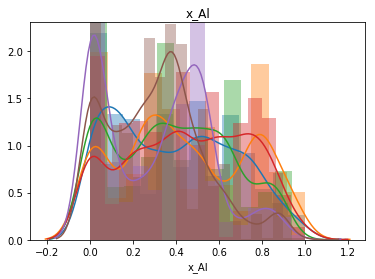

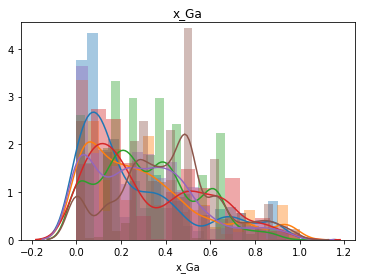

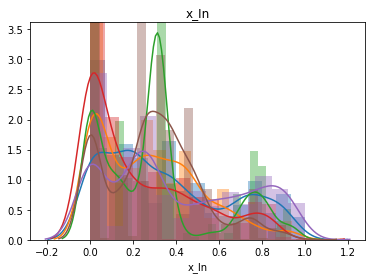

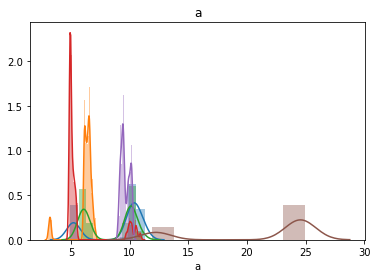

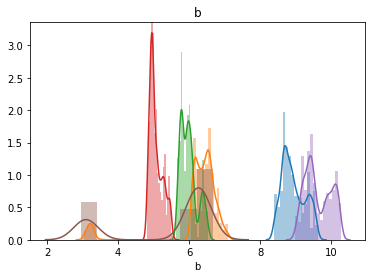

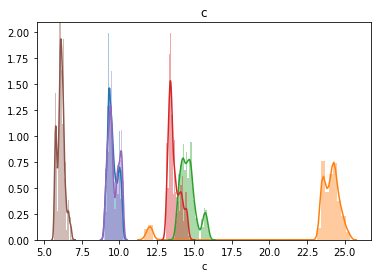

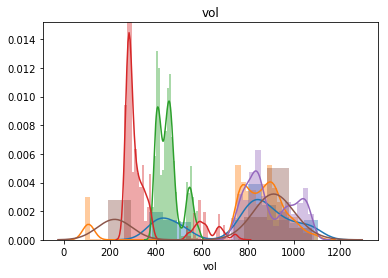

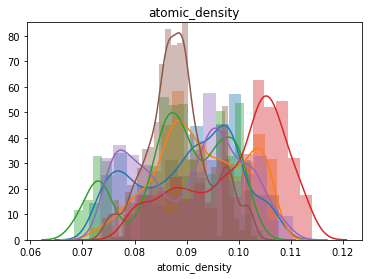

In [10]:
for col in ['x_Al', 'x_Ga', 'x_In', 'a', 'b', 'c', 'vol', 'atomic_density']:
    for x in all_data.sg.unique():
        sns.distplot(all_data[all_data['sg'] == x][col])
    plt.title(col)
    plt.show()

### Looking above, many features such as (a, b, c) have different distributions depending on their group
- You can do some simple feature engineering by grouping the training data and adding the mean for "co-grouped" numerical data
- This improved my score slightly

In [12]:
# make new features using averages of the following columns by sg group
avg_cols = ['x_Al','x_Ga','x_In','a','b','c','avg_rs_max','avg_electronegativity',
            'avg_rp_max','avg_LUMO','avg_IP','avg_rd_max','avg_EA','avg_HOMO',
            'avg_mass','vol','atomic_density']


for col in avg_cols:
    new_col = col + "_avg"
    all_data[new_col] = np.nan
    for group in all_data['sg'].unique():
        all_data.loc[(all_data['sg'] == group), new_col] = all_data[(all_data['sg'] == group)][col].mean()

print('Number of Null Values: {}'.format(pd.isnull(all_data[avg_cols]).sum().sum()))

Number of Null Values: 0


In [13]:
# Handle the values with categorical variables using one hot encoding
# This will create a much more sparse set of variables

all_data[['sg', 'Natoms']] = all_data[['sg', 'Natoms']].astype(str)
all_data = pd.get_dummies(all_data)

### Correcting the distribution of the target variables
- Both of the target variables didn't have quite a normal distribution.
- I used the log1p function to fix this.
- Improved my score slightly

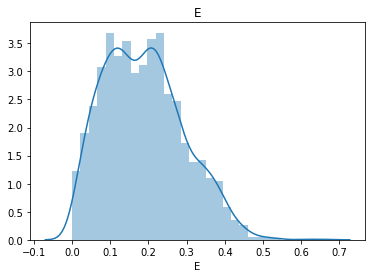

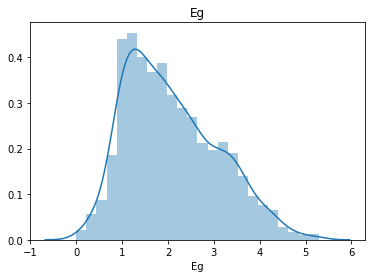

In [14]:
#  both of the target variables are skewed a bit

for col in ['E', 'Eg']:
    sns.distplot((train[col]))
    plt.title(col)
    plt.show()

### Preprocessing data for models


In [16]:
all_data.columns

Index(['E', 'Eg', 'a', 'alpha', 'b', 'beta', 'c', 'gamma', 'id', 'x_Al',
       'x_Ga', 'x_In', 'avg_electronegativity', 'avg_LUMO', 'avg_mass',
       'avg_rp_max', 'avg_EA', 'avg_IP', 'avg_rs_max', 'avg_HOMO',
       'avg_rd_max', 'alpha_r', 'beta_r', 'gamma_r', 'vol', 'atomic_density',
       'x_Al_avg', 'x_Ga_avg', 'x_In_avg', 'a_avg', 'b_avg', 'c_avg',
       'avg_rs_max_avg', 'avg_electronegativity_avg', 'avg_rp_max_avg',
       'avg_LUMO_avg', 'avg_IP_avg', 'avg_rd_max_avg', 'avg_EA_avg',
       'avg_HOMO_avg', 'avg_mass_avg', 'vol_avg', 'atomic_density_avg',
       'Al_0_0', 'Al_1_0', 'Al_2_0', 'Al_3_0', 'Al_4_0', 'Al_5_0', 'Ga_0_0',
       'Ga_1_0', 'Ga_2_0', 'Ga_3_0', 'Ga_4_0', 'Ga_5_0', 'In_0_0', 'In_1_0',
       'In_2_0', 'In_3_0', 'In_4_0', 'In_5_0', 'Natoms_10.0', 'Natoms_20.0',
       'Natoms_30.0', 'Natoms_40.0', 'Natoms_60.0', 'Natoms_80.0', 'O_0_0',
       'O_1_0', 'O_2_0', 'O_3_0', 'O_4_0', 'O_5_0', 'sg_12', 'sg_167',
       'sg_194', 'sg_206', 'sg_227', 'sg_33'],
  

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# features to use
features = ['x_Al', 'x_Ga', 'x_In', 'a', 'b', 'c', 'alpha', 'beta',
            'gamma', 'vol', 'atomic_density', 'x_Al_avg','x_Ga_avg', 'x_In_avg', 'a_avg',
            'b_avg', 'c_avg', 'vol_avg', 'atomic_density_avg', 'pca_abc', 'pca_AlGaInDensity',
            'O_0_0','O_1_0', 'O_2_0', 'O_3_0', 'O_4_0', 'O_5_0', 'Al_0_0', 'Al_1_0', 'Al_2_0', 'Al_3_0', 'Al_4_0', 'Al_5_0', 'Ga_0_0',
            'Ga_1_0', 'Ga_2_0', 'Ga_3_0', 'Ga_4_0', 'Ga_5_0', 'In_0_0', 'In_1_0',
            'In_2_0', 'In_3_0', 'In_4_0', 'In_5_0',]

# two different vectors for pca
vector1 = all_data[['a', 'b', 'c']].values
vector2 = all_data[['x_Al', 'x_Ga', 'x_In', 'atomic_density_avg']].values

# use pca to add new features
pca = PCA()
pca.fit(vector1)
all_data['pca_abc'] = pca.transform(vector1)[:,0]

pca = PCA()
pca.fit(vector2)
all_data['pca_AlGaInDensity'] = pca.transform(vector2)[:,0]

# scaling the data. Linear models tend to like more normally distributed
# I tried training on non-scaled, with slightly worse results
scale = StandardScaler()
scaled = scale.fit(all_data[features]).transform(all_data[features])

X_scale = scaled[:train.shape[0]]
X_scaled_test = scaled[train.shape[0]:]

X_tr = all_data[:train.shape[0]][features].values
X_te = all_data[train.shape[0]:][features].values

y1 = np.log1p(train['E'])
y2 = np.log1p(train['Eg'])

y12 = np.column_stack((y1, y2))

X_tr.shape, y1.shape, y2.shape, y12.shape, X_scaled_test.shape

KeyError: "['atomic_density_avg'] not in index"

### The performance metric for this competition

In [18]:
# performance matric
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y

    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    
#     h, y = np.expm1(h), np.expm1(y)
    
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

# Modeling: NN, GraidentBoost, LightGBM, and XGBoost

### Standard Dense Nerual Network Implimentation
- Use dense layers with Dropout / l2 regularization
- Best RMSLE: 0.0577

In [19]:
import keras
import tensorflow as tf
import keras.backend as K
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization, Input

Using TensorFlow backend.


In [20]:
def get_model(shape):
    """ Returns a model of specific shape
    """
    X_input = Input(shape=(shape,))
    
    X = Dense(64, activation='relu')(X_input)
    X = Dense(64, activation='relu')(X)
    X = Dropout(0.1)(X)
    
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dropout(0.1)(X)
    
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dropout(0.1)(X)
    
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dropout(0.1)(X)
    
    X = Dense(64, activation='relu')(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(2, activation='linear')(X)

    
    return Model(inputs=X_input, outputs=X)

# computes RMSLE from tensorflow
def rmsle_K(y, y0):
    return K.sqrt(K.mean(K.square(tf.log1p(tf.expm1(y)) - tf.log1p(tf.expm1(y0)))))

def compile_model(shape, lr=0.001):
    model = get_model(shape)
    optimizer = Adam(lr=lr, decay=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=[rmsle_K])
    return model

In [21]:
# uncomment below to train the model.

# out = []
# for idx, label in enumerate([0.002, 0.0022, 0.0024, 0.0026]):
#     model = compile_model(X_scale.shape[1], lr=label)
#     evl = model.fit(x=X_scale, y=y12, epochs=600, batch_size=16, verbose=2)
#     out.append(evl.history.get('rmsle_K'))
#     print(str(label) + " rmsle: {}".format(np.mean(out[idx][180:])))

In [22]:
# Will assess the model using cross validation.
# This will take a long time depending on your hardwear
def assess_nn(X, y, params):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    kfold = KFold(n_splits=2, shuffle=True)
    out = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = compile_model(X_scale.shape[1], lr=0.003)
        model.fit(x=X_scale, y=y12, epochs=600, batch_size=16, verbose=0)
        h =  model.predict(X_test)
        e = rmsle(np.expm1(h), np.expm1(y_test))
        print(e)
        out.append(e)
    final.append(np.array(out).mean())
                      
    print('y1 best iteration: {}'.format(np.mean(best_iter[0])))
    print('y2 best iteration: {}'.format(np.mean(best_iter[1])))
    return(np.array(final).mean(), np.array(final).std())

In [23]:
# uncomment to assess model

# model = access(X_scale, y12, params)
# print(model)

In [24]:
# if you run the access function above, use the plotting below to plot the last 40 rows of each kfold

# for x in out:
#     plt.plot(x[-40:])

## Gradient Boosted Regression

### To find values for sklearn "like" packages, I used sklearn-optimization for Baysian Optimization

- Easy implimentation of baysian optimization for sklearn-like model objects
- Multi-threaded, fast, and easy
- For more controll or other models not like sklearn, I like using another baysian optimization package found here: https://github.com/fmfn/BayesianOptimization

In [25]:
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer

from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

### Finding Parameters

- For boosted trees, I start by choosing a learning rate in (0.01, 0.001) range
- Use baysian optimization to find number of estimators for that learning rate. If man estimators are needed, use a larger learning rate
- Use baysian optimization ot find other parameters

In [26]:
# uses baysian optimization to find model parameters

# model = GradientBoostingRegressor(
#     loss='ls',
#     learning_rate = 0.0035,
#     max_depth=23,
#     n_estimators=30275,
#     max_features=9,
#     min_samples_leaf=22,
#     min_samples_split=15,
#     min_weight_fraction_leaf=0.0102470171519909
# )

# search_params = {
#     "n_estimators": Integer(1000, 4000),
#     'max_depth': Integer(2, 40),
#     'min_samples_split': Integer(2, 15),
#     'min_samples_leaf': Integer(2, 50),
#     'min_weight_fraction_leaf': Real(0., .5),
#     'max_features': Integer(2, 13)
# }

# opt = BayesSearchCV(model, search_params, n_iter=50, n_jobs=8, )
# opt.fit(X_scale, y2)
# opt.best_params_

In [27]:
# run different model for different Target Variables

grad_1 = GradientBoostingRegressor(
                loss='ls',
                learning_rate = 0.0035,
                max_depth=7,
                n_estimators=1120,
                max_features=7,
                min_samples_leaf=43,
                min_samples_split=14,
                min_weight_fraction_leaf=0.01556)

grad_2 = GradientBoostingRegressor(
                loss='ls',
                learning_rate = 0.0035,
                max_depth=6,
                n_estimators=3275,
                max_features=2,
                min_samples_leaf=2,
                min_samples_split=2,
                min_weight_fraction_leaf=0.08012)

def assess_grad(X, y_list, model_list):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model = model_list[idx]
            model.fit(X_train, y_train)
            h =  model.predict(X_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print(e)
            out.append(e)
        final.append(np.array(out).mean())
                      
    return(np.array(final).mean(), np.array(final).std())

In [28]:
model = assess_grad(X_tr, [y1, y2], [grad_1, grad_2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

0.0279952315226
0.039074911383
0.0317523707702
0.0302783220314
0.0328445844453
0.0330883856677
0.0287615466657
0.0371129781032
0.0339896178205
0.0306953378679
0.106483610062
0.0843130058484
0.0944888965326
0.0767484130216
0.0828540337901
0.0876703636846
0.102788439447
0.0867991816043
0.0809503808959
0.0994488425759
Model RMSLE: 0.06140692268696467, std: 0.028847594059222062


## Light GBM, a Microsoft package, and great implimentation of a boosted tree model¶
Created and maintained by Microsoft.
Latest commits show a lot of activity
Proven to be very fast and scalable
Offers many more parameters for fine tuning models then similar approaches
Has sklearn Like objects available

In [29]:
import lightgbm as lgb
from lightgbm import Dataset

### Finding Parameters

- For boosted trees, I start by choosing a learning rate in (0.01, 0.001) range
- Use baysian optimization to find number of estimators for that learning rate. If man estimators are needed, use a larger learning rate
- Use baysian optimization ot find other parameters

In [30]:
# find useful parameters for model

# model = lgb.LGBMRegressor(
#                 objective= 'regression',
#                 boosting_type= 'gbdt',
#                 learning_rate= 0.002,
#                 num_boost_round = 2000,
#                 num_threads=1,
#                 bagging_fraction=0.50173,
#                 bagging_freq= 14,
#                 feature_fraction= 0.62509,
#                 lambda_l2= 0.0086298,
# #                 max_depth=10,
#                 num_leaves=196
#             )

# search_params = {
#     'boosting_type': 'gbdt',
#         'objective': 'regression',
#         'metric': {'rmse', 'rmsle'},
#         'max_depth': Integer(20, 100),
#         'num_leaves': Integer(100, 200),
#         'learning_rate': 0.010,
#         'feature_fraction': Real(0.5, 1.),
#         'bagging_fraction': Real(0.5, 1),
#         'bagging_freq': Integer(5, 15),
#         'num_threads': -1,
#         'lambda_l2': Real(.00001, 0.01, 'log_normal'),
#             'lambda_l1': Real(.00001, 0.01, 'log_normal'),
#     'num_iterations': Integer(1000, 4000)
# 

# opt = BayesSearchCV(model, search_params, n_iter=50, n_jobs=-1, verbose=0)
# opt.fit(X_scale, y1)
# opt.best_params_

In [31]:
# Run accessment using parameters found below

lgb_1 = lgb.LGBMRegressor(
                objective= 'regression',
                boosting_type= 'gbdt',
                learning_rate= 0.002,
                n_estimators = 2000,
                num_threads=3,
                bagging_fraction=0.56369,
                bagging_freq= 14,
                feature_fraction= 0.88868,
                lambda_l2= 0.0091689,
                max_depth=20,
                )

lgb_2 = lgb.LGBMRegressor(
                objective= 'regression',
                boosting_type= 'gbdt',
                learning_rate= 0.002,
                n_estimators = 2838,
                num_threads=3,
                bagging_fraction=0.50173,
                bagging_freq= 14,
                feature_fraction= 0.62509,
                lambda_l2= 0.0086298,
                max_depth=20,
                )

# This access uses the built in early stopping functions that make light gmb so great.

def assess_light(X, y_list, model_list):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model = model_list[idx]
            model.fit(X_train, y_train)
            h =  model.predict(X_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())

    return(np.array(final).mean(), np.array(final).std())

In [32]:
model = assess_light(X_scale, [y1, y2], [lgb_1, lgb_2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.03234987258668368
RMSLE: 0.029039232450813652
RMSLE: 0.027661403321157785
RMSLE: 0.0324376025202627
RMSLE: 0.029788350505166303
RMSLE: 0.029828288638157115
RMSLE: 0.0381634361616118
RMSLE: 0.03570223646369316
RMSLE: 0.03449392525648016
RMSLE: 0.03331681200601231
RMSLE: 0.07881511120441725
RMSLE: 0.10362015060269701
RMSLE: 0.09624986515881025
RMSLE: 0.08202719379629758
RMSLE: 0.0856832202714473
RMSLE: 0.09092740576850222
RMSLE: 0.09208801443785751
RMSLE: 0.07621312248761246
RMSLE: 0.08297988459777801
RMSLE: 0.08540991132034972
Model RMSLE: 0.0598397519777904, std: 0.02756163598678653


### Light GBM also has a useful "early-stopping" option. The following access function will use this function

- By experimenting and using bayes optimization, I was able to get better results by manually setting the number of rounds

In [33]:

def assess_early_stop_light(X, y_list, params):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)
            model = lgb.train(params[idx],
                            lgb_train,
                            num_boost_round=1000000,
                            valid_sets=[lgb_valid],
                            early_stopping_rounds=100,
                            verbose_eval=0) 
            best_iter[idx].append(model.best_iteration)
            h =  model.predict(X_test, num_iteration=model.best_iteration)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())
                      
    print('y1 best iteration: {}'.format(np.mean(best_iter[0])))
    print('y2 best iteration: {}'.format(np.mean(best_iter[1])))
    return(np.array(final).mean(), np.array(final).std())

In [34]:

params1 = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse', 'rmsle'},
            'max_depth': 10,
            'learning_rate': 0.010,
            'feature_fraction': 0.8632,
            'bagging_fraction': 0.8759,
            'bagging_freq': 4,
            'verbose': 0,
            'verbose_eval':0,
            'num_threads': 3,
            'lambda_l2': 0.0005597442104287973,
            'lambda_l1': 0.00015997163552092318 
        }

params2 = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse', 'rmsle'},
            'learning_rate': 0.010,
            'verbose': 0,
            'verbose_eval':0,
            'num_threads': 3,
            'bagging_fraction': 0.9311539021934098,
             'bagging_freq': 15,
             'feature_fraction': 0.9989744117209727,
             'lambda_l1': 8.337666829263869e-05,
             'lambda_l2': 0.005541689229153562,
             'max_depth': 19
        }

model = assess_early_stop_light(X_tr, [y1, y2], [params1, params2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.030370477590816368
RMSLE: 0.02797310195778193
RMSLE: 0.030481384562151367
RMSLE: 0.03229691722662916
RMSLE: 0.030274156529733746
RMSLE: 0.03515856923488133
RMSLE: 0.03843454992625613
RMSLE: 0.027642444997932492
RMSLE: 0.03177756938145652
RMSLE: 0.033383556187285404
RMSLE: 0.0907337403387342
RMSLE: 0.10561011978134162
RMSLE: 0.07316070289080556
RMSLE: 0.08047802257024396
RMSLE: 0.0923527457140169
RMSLE: 0.09634406143316684
RMSLE: 0.09455031021198565
RMSLE: 0.08803003340091146
RMSLE: 0.08577164252915993
RMSLE: 0.08052616275066712
y1 best iteration: 387.8
y2 best iteration: 485.2
Model RMSLE: 0.06026751346079788, std: 0.02848824070130544


## XGBoost, one of the most popular and successful boosting tree algorithms
- Available in many different languages
- Very fast and scalable
- Often wins many different Kaggle competions

In [35]:
from xgboost import XGBRegressor

In [36]:
# find useful parameters for model

# model = XGBRegressor(
#     silent=True,
#     learning_rate= 0.0050,
#     n_jobs=1
# )

# search_params1 = {

#     'n_estimators': Integer(1804, 1806),
#     'gamma': Real(0, 100),
#     'max_depth' : Integer(15, 100),
#     'min_child_weight': Integer(10, 1000),
#     'max_delta_step': Integer(1, 100),
#     'subsample': Real(0, 1),
#     'colsample_bytree': Real(0.0001, 1),
#     'colsample_bylevel': Real(0.0001, 1),
#     'reg_lambda': Real(0.000000001, 1.0),
# }

# xgb_params_1 = {
#     'learning_rate':0.005,
#     'n_jobs':-1,
#     'n_estimators': 1804,
#     'gamma': 0.0,
#     'subsample': 0.749700,
#     'colsample_bytree': 1.0,
#     'colsample_bylevel': 0.2790166932949295,
#     'max_delta_step': 1,
#     'max_depth': int(15),
#     'min_child_weight': 30,
#     'reg_lambda': 1e-09,
#     'silent': True,
#     'n_jobs': 8}

# search_params2 = {

#     'n_estimators': Integer(2383, 2400),
# #     'gamma': Real(0, 100),
#     'max_depth' : Integer(15, 100),
#     'min_child_weight': Integer(10, 100),
#     'max_delta_step': Integer(1, 200),
#     'subsample': Real(0, 1),
#     'colsample_bytree': Real(0.01, 1),
#     'colsample_bylevel': Real(0.01, 1),
#     'reg_lambda': Real(0.0000001, 0.5),
    
# }

# xgb_params_2 = {
#     'learning_rate':0.005,
#     'n_jobs':-1,
#     'n_estimators': 2383,
#     'colsample_bylevel': 0.982522,
#     'colsample_bytree': 1.0,
#     'gamma': 0.0,
#     'max_depth': 15,
#     'min_child_weight': 63,
#     'colsample_bytree': 0.4254153401195336,
#     'max_delta_step': 65,
#     'reg_lambda': 0.031165789070644215,
#     'subsample': 0.6831707073621087,
#     'silent':True,
#     'n_jobs':8,
# }

# for params, y, i in zip([search_params1, search_params2], [y1, y2], ['1', '2']):
#     opt = BayesSearchCV(model, params, n_iter=100, n_jobs=-1, verbose=0)
#     opt.fit(X_tr, y)
#     print('y' + i, opt.best_params_)

In [37]:
xgb_1 = XGBRegressor(
    learning_rate=0.005,
    n_jobs=3,
    n_estimators= 1804,
    gamma= 0.0,
    subsample= 0.222159,
    colsample_bytree= 0.5359,
    colsample_bylevel= 0.19958,
    max_delta_step= 64,
    max_depth=28,
    min_child_weight= 10,
    reg_lambda=0.33038,
    silent= True,
)

xgb_2 = XGBRegressor(
    learning_rate=0.005,
    n_jobs=3,
    n_estimators= 2386,
    gamma= 0.0,
    subsample= 0.90919,
    colsample_bytree= 0.59049,
    colsample_bylevel= 0.59404,
    max_delta_step= 99,
    max_depth=58,
    min_child_weight= 85,
    reg_lambda= 0.031165789070644215,
    silent= True,
)
def assess_xgb(X, y_list, model_num):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model = model_num[idx]
            model.fit(X_train, y_train)
            h =  model.predict(X_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())
    return(np.array(final).mean(), np.array(final).std())

In [38]:
model = assess_xgb(X_scale, [y1, y2], [xgb_1, xgb_2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.03653093487877401
RMSLE: 0.027282565312806706
RMSLE: 0.03672761320306366
RMSLE: 0.030459554066835086
RMSLE: 0.034217884533708075
RMSLE: 0.03737850684096308
RMSLE: 0.02965841157970426
RMSLE: 0.03175329070249159
RMSLE: 0.03244393436698966
RMSLE: 0.02817155375850324
RMSLE: 0.0837027814559354
RMSLE: 0.08504078281584763
RMSLE: 0.07600417190964869
RMSLE: 0.07076209401154006
RMSLE: 0.07756440396183334
RMSLE: 0.10697409354741708
RMSLE: 0.09740580083029571
RMSLE: 0.09244109049870178
RMSLE: 0.08357905844424526
RMSLE: 0.07092319868242875
Model RMSLE: 0.05845108627008666, std: 0.025988661345702727


## Early Stopping with XGBoost

In [41]:
from xgboost import DMatrix
import xgboost as xgb
from sklearn.model_selection import train_test_split

xgb_param_1 = {
    'learning_rate': 0.005,
    'n_jobs': 3,
    'gamma': 0.0,
    'subsample': 0.222159,
    'colsample_bytree': 0.5359,
    'colsample_bylevel': 0.19958,
    'max_delta_step': 64,
    'max_depth': 28,
    'min_child_weight': 10,
    'reg_lambda': 0.33038,
    'silent':  True
}
    
xgb_param_2 = {
    'learning_rate': 0.005,
    'n_jobs': 3,
    'gamma': 0.0,
    'subsample': 0.90919,
    'colsample_bytree': 0.59049,
    'colsample_bylevel': 0.59404,
    'max_delta_step': 99,
    'max_depth': 58,
    'min_child_weight': 85,
    'reg_lambda': 0.031165789070644215,
    'silent': True
}

def assess_early_cv_stop_xgb(X, y_list, param_list):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_iter, X_test = X[train_index], X[test_index]
            y_iter, y_test = y[train_index], y[test_index]
            X_train, X_valid, y_train, y_valid = train_test_split(X_iter, y_iter, test_size=0.3)
            
            xgb_train = DMatrix(X_train, label=y_train)
            xgb_valid = DMatrix(X_valid, y_valid)
            xgb_test = DMatrix(X_test, y_test)
            watchlist = [ (xgb_train,'train'), (xgb_valid, 'valid') ]
            model = xgb.train(param_list[idx], xgb_train, 1000000,
                              watchlist, early_stopping_rounds=20, verbose_eval=False)
            
            h =  model.predict(xgb_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())
    return(np.array(final).mean(), np.array(final).std())

In [43]:
model = assess_early_cv_stop_xgb(X_tr, [y1, y2], [xgb_param_1, xgb_param_2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.033961954377611334
RMSLE: 0.030776939290798413
RMSLE: 0.036774928600325545
RMSLE: 0.03011192781372481
RMSLE: 0.032162924838892507
RMSLE: 0.029642013152672696
RMSLE: 0.03510383001214069
RMSLE: 0.030846159331381483
RMSLE: 0.02864495200334554
RMSLE: 0.041084418713814644
RMSLE: 0.07030903569498927
RMSLE: 0.08292046940430917
RMSLE: 0.0918863789007945
RMSLE: 0.09133036965762757
RMSLE: 0.08564919417482875
RMSLE: 0.0873593170950806
RMSLE: 0.08941057195323804
RMSLE: 0.09546750198410306
RMSLE: 0.08571458398382034
RMSLE: 0.08621681557313522
Model RMSLE: 0.05976871432783171, std: 0.026857709514360947


## Catboost, another great boosting regressor

In [47]:
from catboost import CatBoostRegressor

In [45]:
# I found these parameterw worked for both y variables
cat_1 = CatBoostRegressor(iterations=2300,
                          learning_rate=0.020,
                          depth=5,
                          loss_function='RMSE',
                          eval_metric='RMSE',
                          od_type='Iter',
                          od_wait=50,
                         )

def assess_cat(X, y_list, model_num):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model = model_num[idx]
            model.fit(X_train, y_train, verbose=False)
            h =  model.predict(X_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())
    return(np.array(final).mean(), np.array(final).std())

In [46]:
model = assess_cat(X_tr, [y1, y2], [cat_1, cat_1])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.028307916745422504
RMSLE: 0.03509606068519698
RMSLE: 0.033034820063021414
RMSLE: 0.03156374708225134
RMSLE: 0.0266118843053654
RMSLE: 0.03186425989991136
RMSLE: 0.03739268106625664
RMSLE: 0.03224434888712258
RMSLE: 0.0295393573827004
RMSLE: 0.029251498379758375
RMSLE: 0.09561198177799418
RMSLE: 0.08353409166660176
RMSLE: 0.07477782067360032
RMSLE: 0.09393566492376422
RMSLE: 0.09347380751819269
RMSLE: 0.08641331226048743
RMSLE: 0.09784131191078912
RMSLE: 0.09233190444830414
RMSLE: 0.08403978621448194
RMSLE: 0.0799894784535259
Model RMSLE: 0.05984278671723743, std: 0.028352129267536733


# Catboost has another great feature in built in validation
- models are validated and the best model is returned for pedictions
- you have to split up the data more times, so more data is necessary to make this work

In [48]:
from sklearn.model_selection import train_test_split

catboost_cv = CatBoostRegressor(iterations=1200,
                            learning_rate=0.03,
                            depth=5,
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            random_seed=99,
                            od_type='Iter',
                            od_wait=50)
    
def assess_cv_catboost(X, y_list):
    """ Used to access model performance. Returns the mean rmsle score of cross validated data
    """
    final = []
    best_iter = [[], []]
    for idx, y in enumerate(y_list):
        kfold = KFold(n_splits=10, shuffle=True)
        out = []
        for train_index, test_index in kfold.split(X):
            # splitting the data up into train, test, and valid sets
            X_iter, X_test = X[train_index], X[test_index]
            y_iter, y_test = y[train_index], y[test_index]
            X_train, X_valid, y_train, y_valid = train_test_split(X_iter, y_iter, test_size=0.3)
            model =  catboost_cv
            model.fit(X_train, y_train,
                      eval_set=(X_valid, y_valid),
                      use_best_model=True,
                      verbose=False)
            h =  model.predict(X_test)
            e = rmsle(np.expm1(h), np.expm1(y_test))
            print('RMSLE: {}'.format(e))
            out.append(e)
        final.append(np.array(out).mean())
    return(np.array(final).mean(), np.array(final).std())

In [49]:
model = assess_cv_catboost(X_tr, [y1, y2])
print("Model RMSLE: {}, std: {}".format(model[0], model[1]))

RMSLE: 0.038099508928908066
RMSLE: 0.03725208807471439
RMSLE: 0.026000180707911342
RMSLE: 0.030163112388562986
RMSLE: 0.029098402881431416
RMSLE: 0.037053908975057
RMSLE: 0.028948348602870308
RMSLE: 0.0333111591196836
RMSLE: 0.02898251894369619
RMSLE: 0.030282772510735672
RMSLE: 0.09039886654518231
RMSLE: 0.09344486902743658
RMSLE: 0.0777418953200512
RMSLE: 0.09023099078226547
RMSLE: 0.08975721725098329
RMSLE: 0.0818759862288147
RMSLE: 0.08955213180615976
RMSLE: 0.07629655818187142
RMSLE: 0.1011690885045427
RMSLE: 0.07342143994642392
Model RMSLE: 0.05915405223636512, std: 0.027234852123008024


## Model Stacking,  combining many models to improve accuracy

- Stacking Meta Models use 2 tiers
- First tier uses "base models" to predict y values
- Second tier uses "meta models" on the predicted values to as the final predictor

Find more information on this stacking approach, here is a great Kaggle blog about it: http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/

In [50]:
from sklearn.linear_model import  LinearRegression
from sklearn.base import clone

class StackingAveragedModels():
    def __init__(self, base_models, meta_model, n_folds=15):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                try:
                    instance.fit(X[train_index], y[train_index], verbose=False)
                except:
                    instance.fit(X[train_index], y[train_index])

                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

# Below is Another Stacked Model, but with each model using their built in version of early stopping
- This requires you to further split up the data, which for this problem might be worse for training

In [51]:
# stacking with early stopping for all models

from sklearn.linear_model import  LinearRegression
from sklearn.base import clone
import sklearn
import xgboost
import catboost
import lightgbm

class StackingStoppingAveragedModels():
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):

                 # all models support early stopping in one way and need a valid set for it
                X_train, X_valid, y_train, y_valid = train_test_split(X[train_index],
                                                                      y[train_index],
                                                                      test_size=0.3)
                instance = clone(model)
                
                if type(instance) == sklearn.ensemble.gradient_boosting.GradientBoostingRegressor:
                    instance.min_impurity_decrease = 0.01
                    
                    # use all data since grad boosting's "early stopping" is a parameter on leafs
                    instance.fit(X[train_index], y[train_index])
                    
                elif type(instance) == xgboost.sklearn.XGBRegressor:
                    instance.n_estimators = 10000000
                    instance.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="rmse",
                                 eval_set=[(X_valid, y_valid)], verbose=False)
                    
                elif type(instance) == catboost.core.CatBoostRegressor:
                        instance.fit(X_train, y_train, eval_set=[X_valid, y_valid],
                                     use_best_model=True, verbose=False)
                        
                elif type(instance) == lightgbm.sklearn.LGBMRegressor:
                        instance.n_estimators = 10000000
                        instance.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
                                     early_stopping_rounds=100, verbose=False)
                    
                self.base_models_[i].append(instance)
                
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [52]:
# stacking for y1
cat_1 = CatBoostRegressor(iterations=1400,
                            learning_rate=0.03,
                            depth=5,
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            od_type='Iter',
                            od_wait=50)
xgb_1 = XGBRegressor(
    learning_rate=0.005,
    n_jobs=3,
    n_estimators= 1804,
    gamma= 0.0,
    subsample= 0.222159,
    colsample_bytree= 0.5359,
    colsample_bylevel= 0.19958,
    max_delta_step= 64,
    max_depth=28,
    min_child_weight= 10,
    reg_lambda=0.33038,
    silent= True)

lgb_1 = lgb.LGBMRegressor(
                objective= 'regression',
                boosting_type= 'gbdt',
                learning_rate= 0.002,
                n_estimators = 2000,
                num_threads=3,
                bagging_fraction=0.56369,
                bagging_freq= 14,
                feature_fraction= 0.88868,
                lambda_l2= 0.0091689,
                max_depth=96,
                )

grad_1 = GradientBoostingRegressor(
                loss='ls',
                learning_rate = 0.0035,
                max_depth=7,
                n_estimators=1120,
                max_features=7,
                min_samples_leaf=43,
                min_samples_split=14,
                min_weight_fraction_leaf=0.01556)
linear = LinearRegression()

In [53]:
cat_2 = CatBoostRegressor(iterations=1200,
                            learning_rate=0.03,
                            depth=5,
                            loss_function='RMSE',
                            eval_metric='RMSE',
                            od_type='Iter',
                            od_wait=50)
lgb_2 = lgb.LGBMRegressor(
                objective= 'regression',
                boosting_type= 'gbdt',
                learning_rate= 0.002,
                n_estimators = 2838,
                num_threads=3,
                bagging_fraction=0.50173,
                bagging_freq= 14,
                feature_fraction= 0.62509,
                lambda_l2= 0.0086298,
                max_depth=20
                )

grad_2 = GradientBoostingRegressor(
                loss='ls',
                learning_rate = 0.0035,
                max_depth=6,
                n_estimators=3275,
                max_features=2,
                min_samples_leaf=2,
                min_samples_split=2,
                min_weight_fraction_leaf=0.08012)

xgb_2 = XGBRegressor(
    learning_rate=0.005,
    n_jobs=3,
    n_estimators= 2386,
    gamma= 0.0,
    subsample= 0.90919,
    colsample_bytree= 0.59049,
    colsample_bylevel= 0.59404,
    max_delta_step= 99,
    max_depth=58,
    min_child_weight= 85,
    reg_lambda= 0.031165789070644215,
    silent= True,
)

In [71]:
# without early stopping
stacked_1 = StackingAveragedModels(base_models=[xgb_1, lgb_1, grad_1, cat_1], meta_model=linear)
stack_1 = stacked_1.fit(X_scale, y1)

stacked_2 = StackingAveragedModels(base_models=[xgb_2, lgb_2, grad_2, cat_1], meta_model=linear)
stack_2 = stacked_2.fit(X_scale, y2)

In [ ]:
# with early stopping
# uncomment to run this

# stacked_stop_1 = StackingStoppingAveragedModels(base_models=[xgb_1, lgb_1, grad_1, cat_1], meta_model=linear)
# stack_1 = stacked_stop_1.fit(X_scale, y1)

# stacked_stop_2 = StackingStoppingAveragedModels(base_models=[xgb_2, lgb_2, grad_2, cat_1], meta_model=linear)
# stack_2 = stacked_stop_2.fit(X_scale, y2)

# Create Submission

In [80]:
all_data

,Al_0,Al_1,Al_2,Al_3,Al_4,Al_5,E,Eg,Ga_0,Ga_1,...,avg_EA,avg_IP,avg_rs_max,avg_HOMO,avg_rd_max,alpha_r,beta_r,gamma_r,vol,atomic_density
0,-1.635782,8.329246,9.701635,-3.014362,-8.065853,-5.314884,0.0680,3.4387,-6.919791,-4.515422,...,-0.200725,-5.794325,1.077500,-2.710125,2.753750,1.570842,1.570836,1.570826,781.052081,0.102426
1,-18.419275,-6.192290,-16.480367,6.425966,34.899642,-0.233676,0.2490,2.9210,-10.811701,3.517937,...,-0.200725,-5.794325,1.077500,-2.710125,2.753750,1.571121,1.570761,2.094439,782.500110,0.102236
2,-0.654212,8.849083,14.034045,-4.107776,-13.379833,-4.741307,0.1821,2.7438,-1.524974,1.676799,...,-0.228512,-5.787162,1.103750,-2.703563,2.931875,1.587705,1.590393,0.532648,391.227531,0.102242
3,-7.992108,-2.809091,-6.506316,3.007795,14.498424,-0.198704,0.2172,3.3492,0.000000,0.000000,...,-0.270350,-5.719350,1.120000,-2.718750,2.817500,1.570601,1.571004,2.094425,293.377334,0.102257
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0505,1.3793,-19.086240,-6.308899,...,-0.184750,-5.712900,1.027500,-2.751500,2.077500,1.570727,1.570807,2.094208,944.713843,0.084682
5,-1.488744,6.941195,12.190020,-2.793463,-10.701276,-4.147733,0.2209,2.1633,-0.460886,5.896196,...,-0.191462,-5.796712,1.068750,-2.712313,2.694375,1.590405,1.593543,0.533600,404.315578,0.098933
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0562,0.9854,-2.027088,2.672058,...,-0.291574,-5.571308,1.081868,-2.776408,1.997140,1.570812,1.570810,1.570774,1050.775947,0.076134
7,5.995918,-0.759887,-5.004703,-1.322897,-0.991216,2.082784,0.2243,1.7179,0.000000,0.000000,...,-0.284400,-5.658700,1.110000,-2.740500,2.525000,1.570791,1.835720,1.570798,232.217827,0.086126
8,-0.722325,7.782793,10.415110,-3.472031,-9.692785,-4.310762,0.2193,2.6257,7.623756,-0.240463,...,-0.237924,-5.727708,1.089368,-2.726408,2.609640,1.570840,1.570849,1.570758,831.246873,0.096241
9,-13.763072,-5.341080,-11.608416,5.652281,25.371488,-0.311201,0.1994,2.5187,-16.175241,4.797590,...,-0.168299,-5.802683,1.046868,-2.717783,2.545890,1.571097,1.570786,2.094390,805.417178,0.099327


In [79]:
one = stack_1.predict(X_scaled_test)
two = stack_2.predict(X_scaled_test)
_id = test['id']

submit = pd.DataFrame({'id':_id,
                       'formation_energy_ev_natom':np.expm1(one).flatten(),
                       'bandgap_energy_ev':np.expm1(two).flatten()})

ValueError: array length 9600 does not match index length 600

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submission.csv', index=False)

Thanks a ton for looking at this Kernel. I will continue to update it as I can. If you have any questions or comments, please let me know.